# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# muat dataset (menggunakan dataset bank transaction)
df = pd.read_csv('/content/drive/MyDrive/ML dicoding/machine learning untuk pemula/submission/Dataset_clustering.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [ ]:
# cek duplikat
df.duplicated().sum()

np.int64(0)

In [ ]:
#melihat statistik deskriptif
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002496,AC00460,NaN,2023-04-03 16:07:53,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


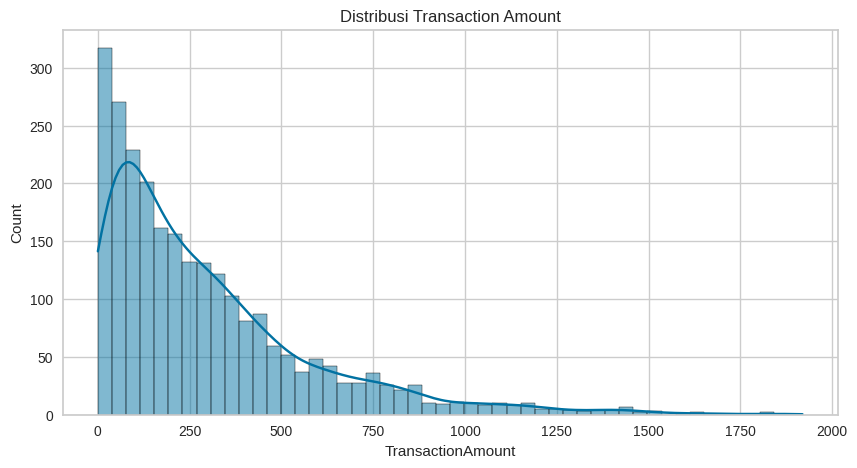

In [ ]:
# Visualisasi distribusi TransactionAmount dengan
plt.figure(figsize=(10, 5))
sns.histplot(df['TransactionAmount'], bins=50, kde=True)
plt.title('Distribusi Transaction Amount')
plt.show()

<ipython-input-8-c25a6360eba5>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['AgeGroup'], y=df['TransactionAmount'], estimator=np.mean, ci=None, palette='viridis')
<ipython-input-8-c25a6360eba5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['AgeGroup'], y=df['TransactionAmount'], estimator=np.mean, ci=None, palette='viridis')


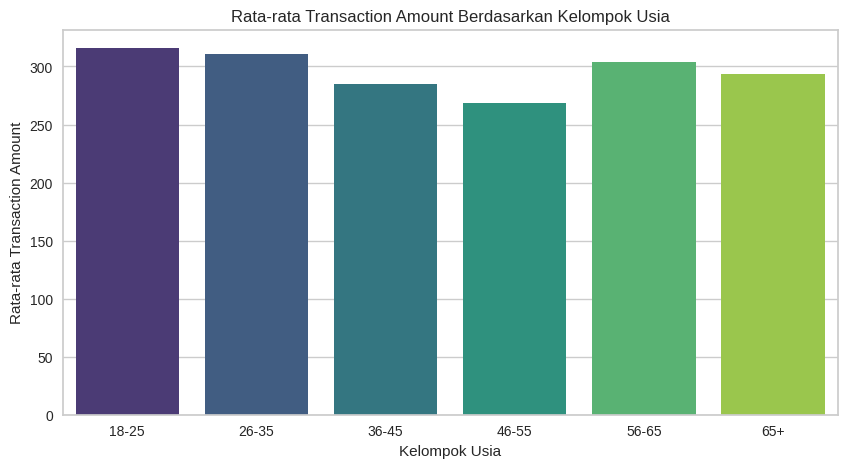

In [ ]:
# EDA: Kelompok Usia vs TransactionAmount
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=df['AgeGroup'], y=df['TransactionAmount'], estimator=np.mean, ci=None, palette='viridis')
plt.title('Rata-rata Transaction Amount Berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Rata-rata Transaction Amount')
plt.show()

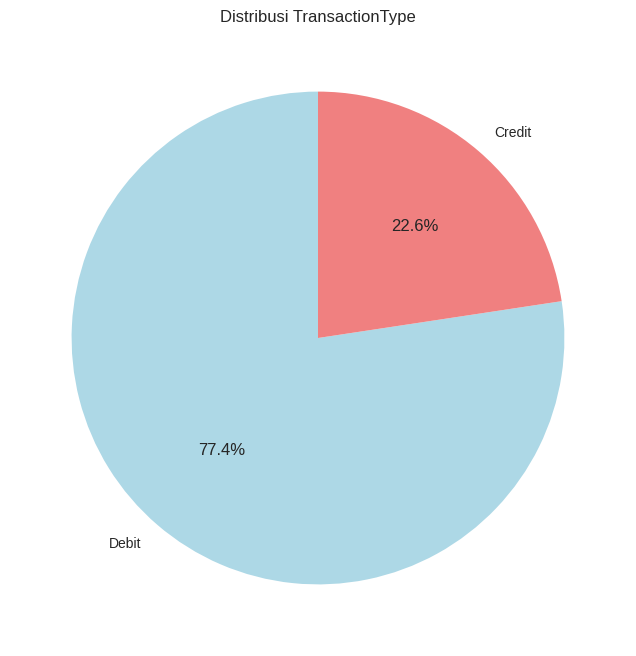

In [ ]:
# Pie Chart untuk distribusi TransactionType
plt.figure(figsize=(8, 8))
df['TransactionType'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Distribusi TransactionType')
plt.ylabel('')
plt.show()

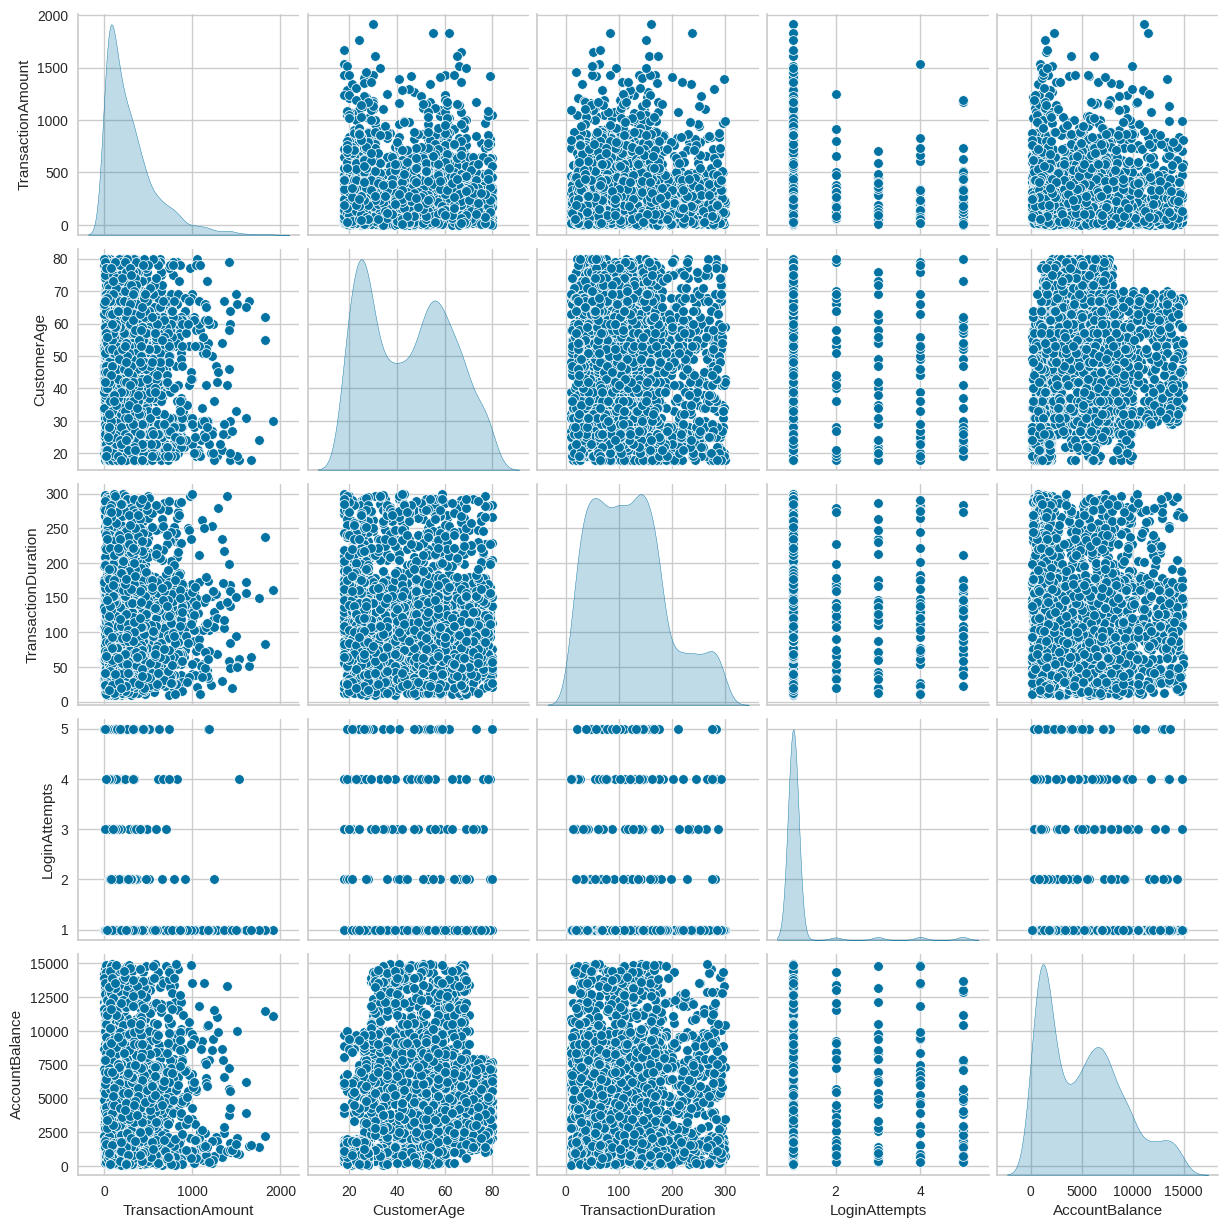

In [ ]:
# visualisasi apakah ada hubungan linear antara dua variabel tertentu dengan pair plot
# Pilih hanya fitur numerik
df_numeric = df.select_dtypes(include=['number'])

# Scatter plot untuk melihat hubungan antar variabel numerik
sns.pairplot(df, vars=df_numeric, diag_kind='kde')
plt.show()

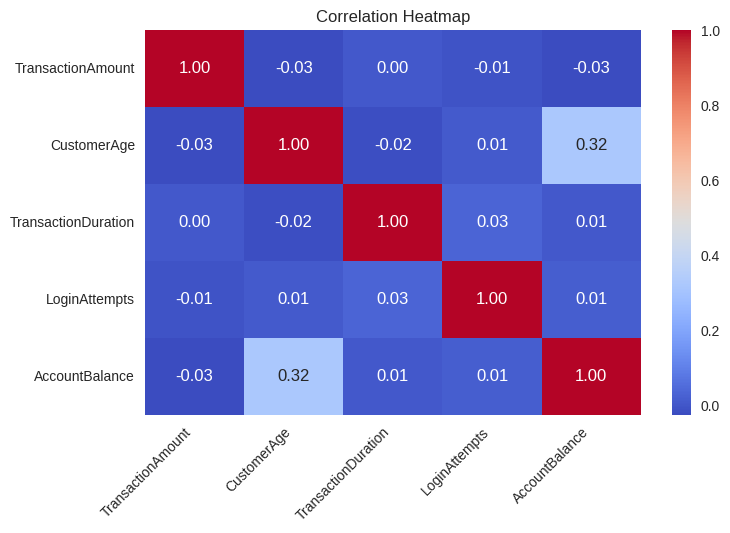

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha='right')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
# Identifikasi outlier menggunakan IQR
df_numeric = df.select_dtypes(include=['number'])

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Buat DataFrame boolean: True kalau outlier
is_outlier = (df_numeric < lower_bound) | (df_numeric > upper_bound)

# Filter baris yang punya outlier minimal di satu kolom
outliers_iqr = df[is_outlier.any(axis=1)].copy()

# Tambahin kolom info outlier
outliers_iqr['Outlier_Columns'] = is_outlier.apply(lambda row: list(row[row].index), axis=1)

print(outliers_iqr[['Outlier_Columns']])
print(f"\nJumlah outlier (IQR): {len(outliers_iqr)}")

          Outlier_Columns
23        [LoginAttempts]
26        [LoginAttempts]
32        [LoginAttempts]
38        [LoginAttempts]
61        [LoginAttempts]
...                   ...
2436  [TransactionAmount]
2445      [LoginAttempts]
2455      [LoginAttempts]
2457      [LoginAttempts]
2492      [LoginAttempts]

[230 rows x 1 columns]

Jumlah outlier (IQR): 230


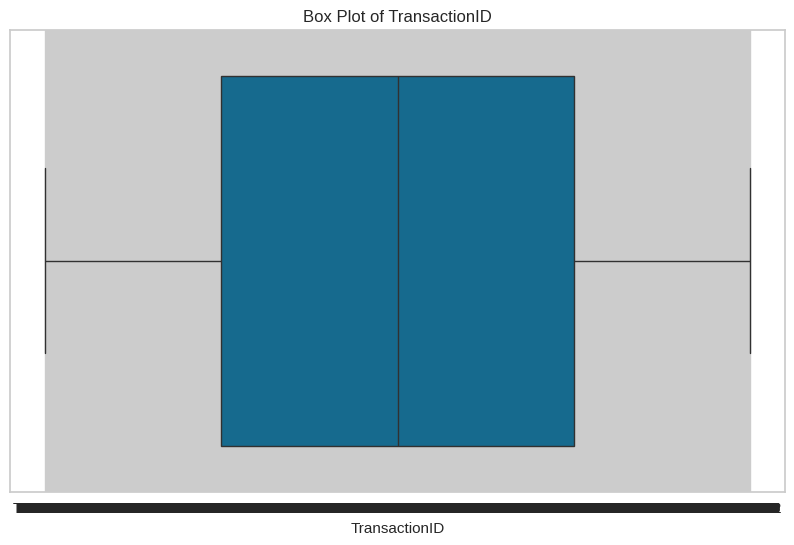

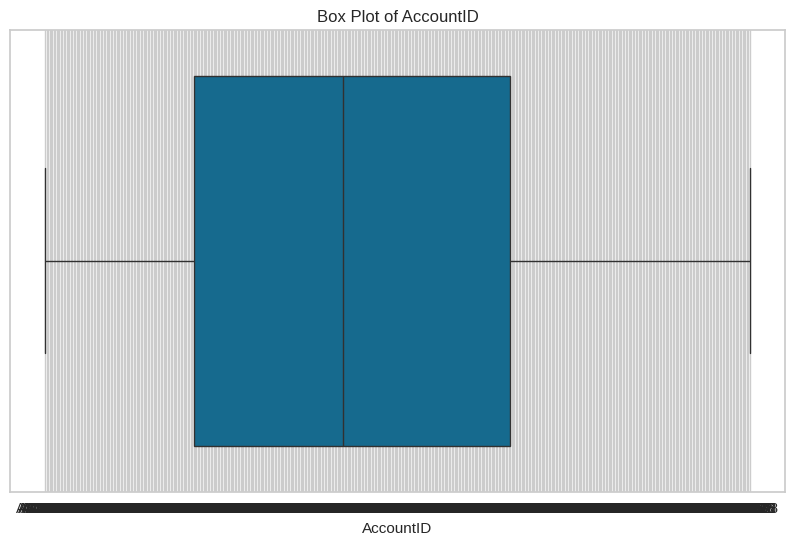

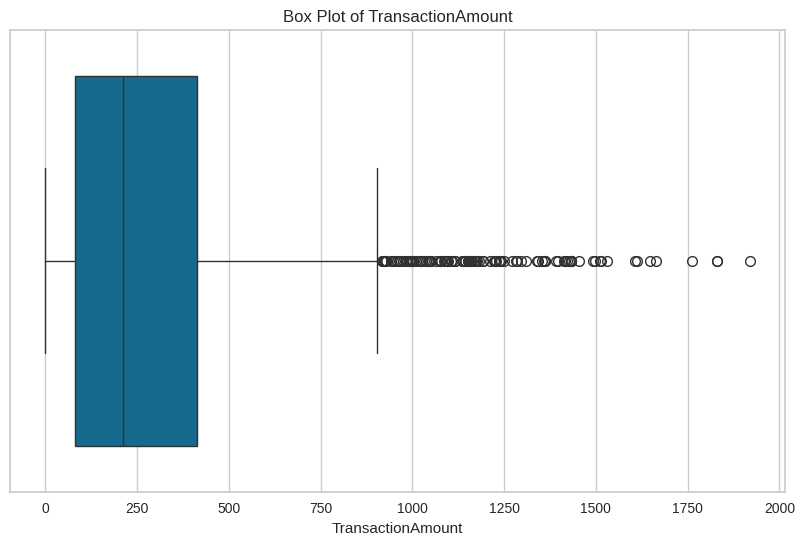

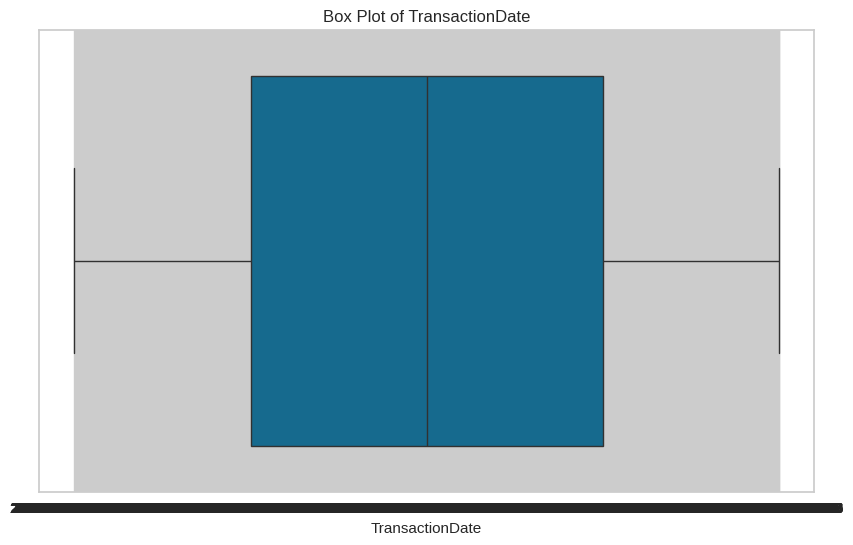

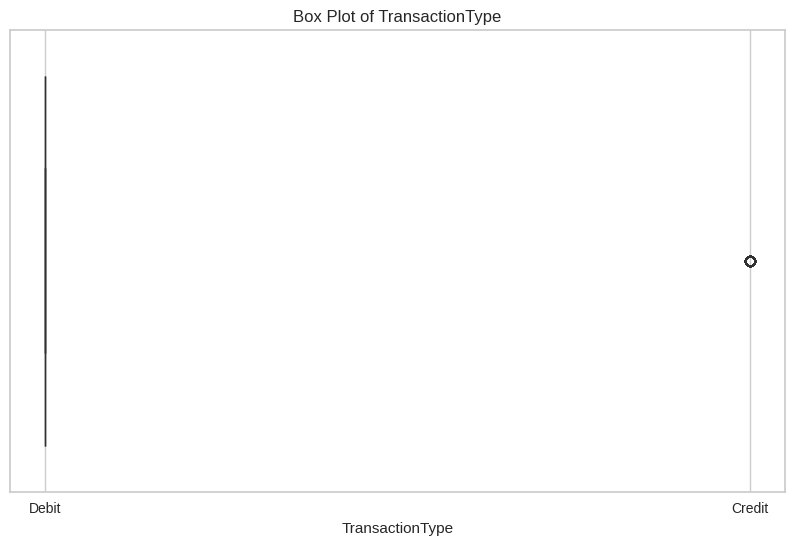

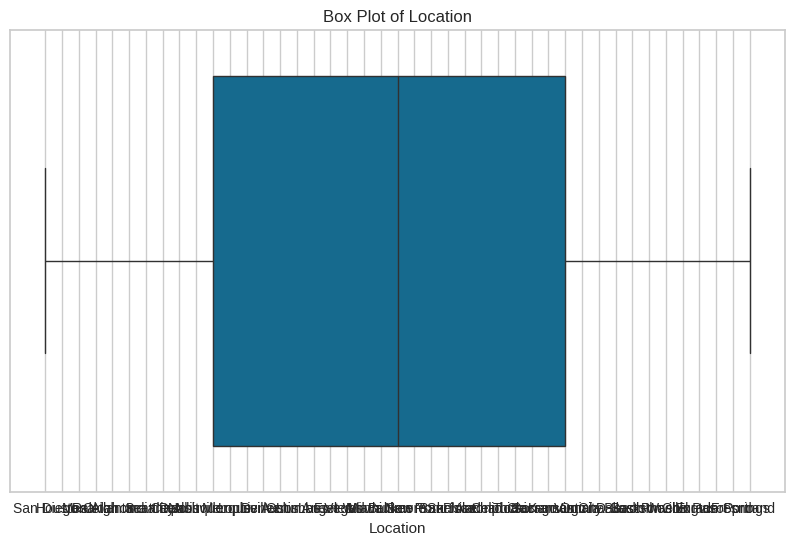

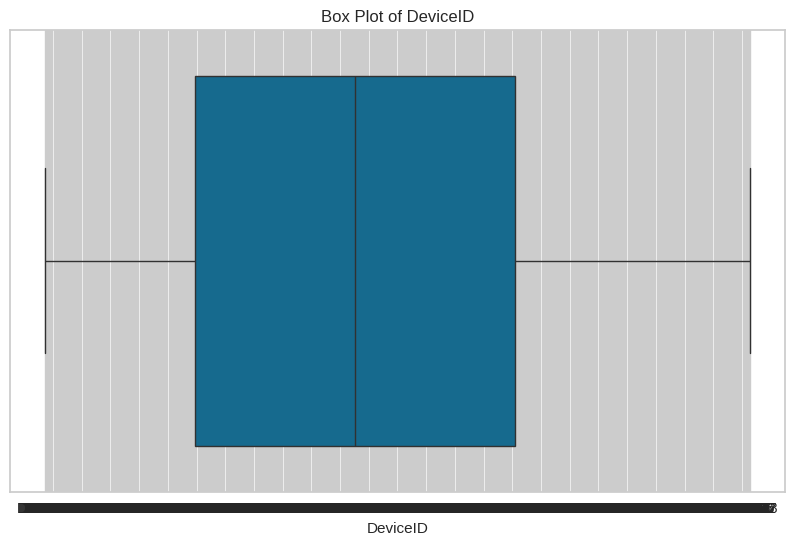

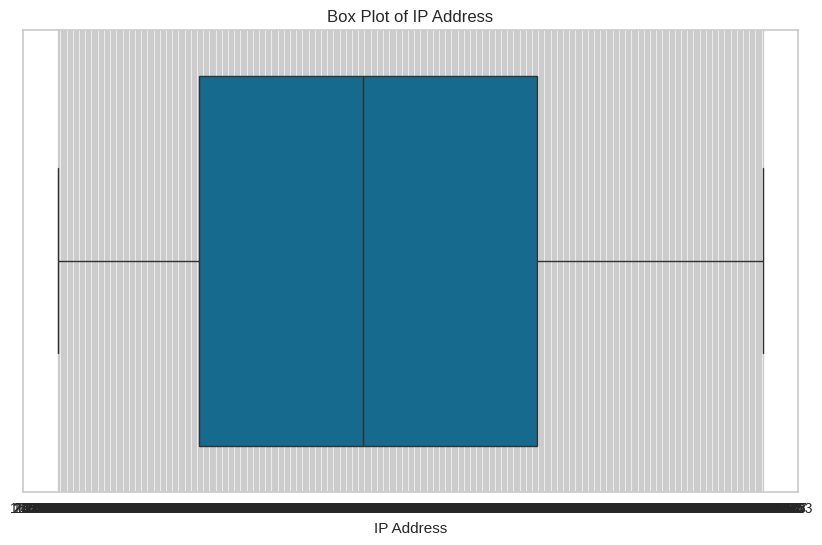

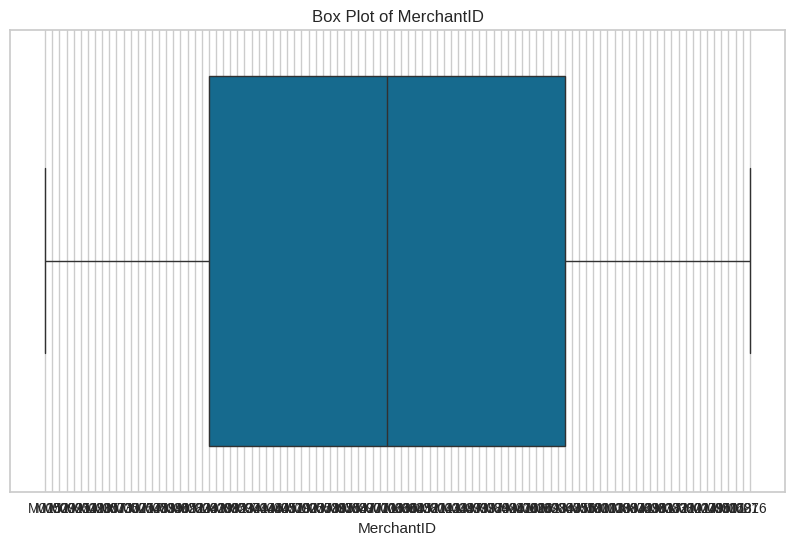

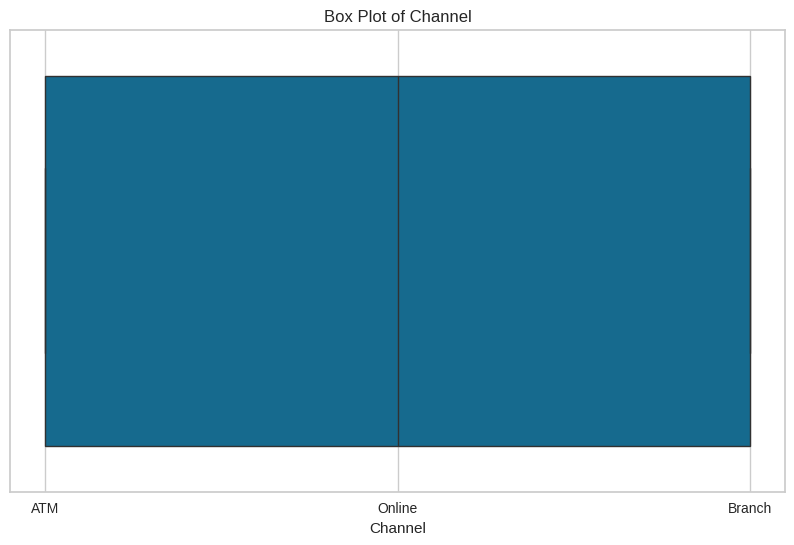

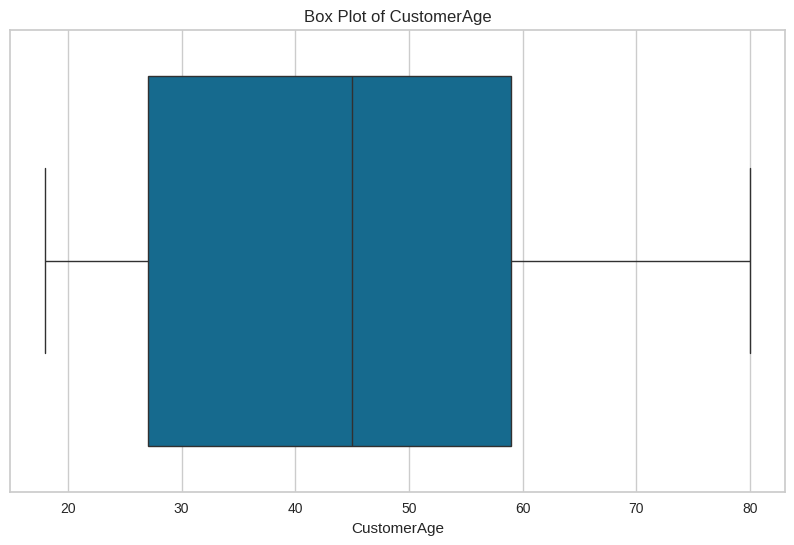

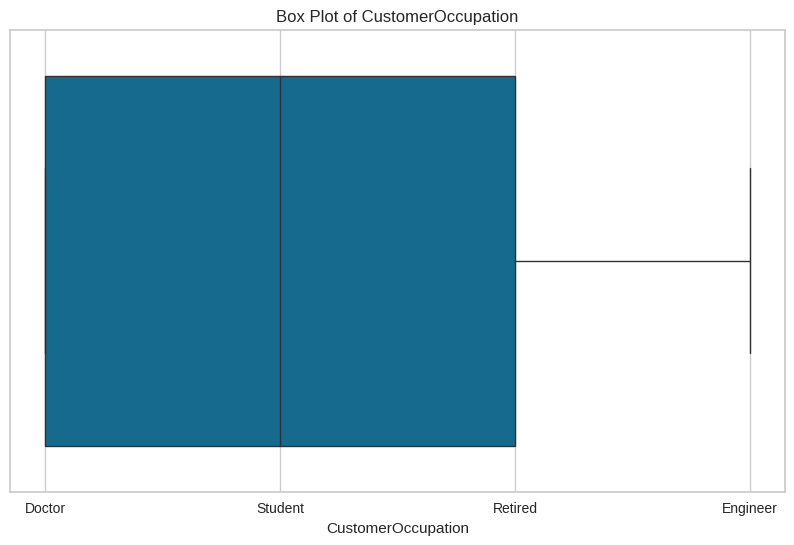

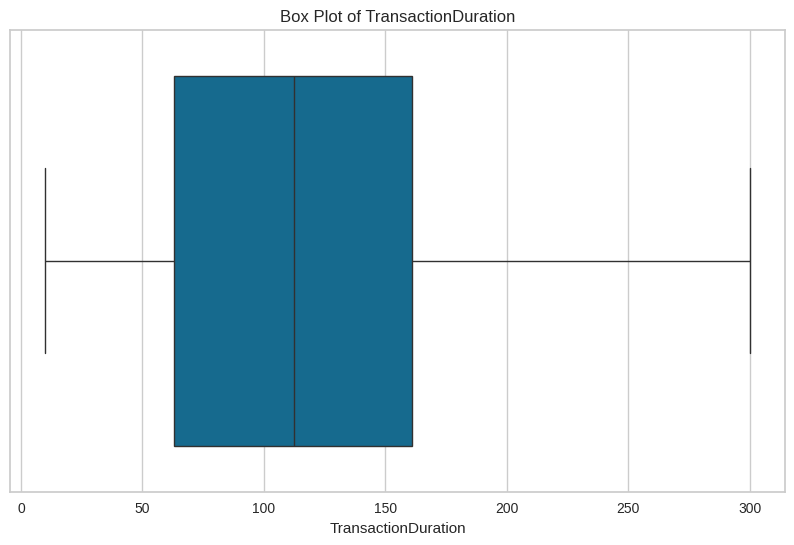

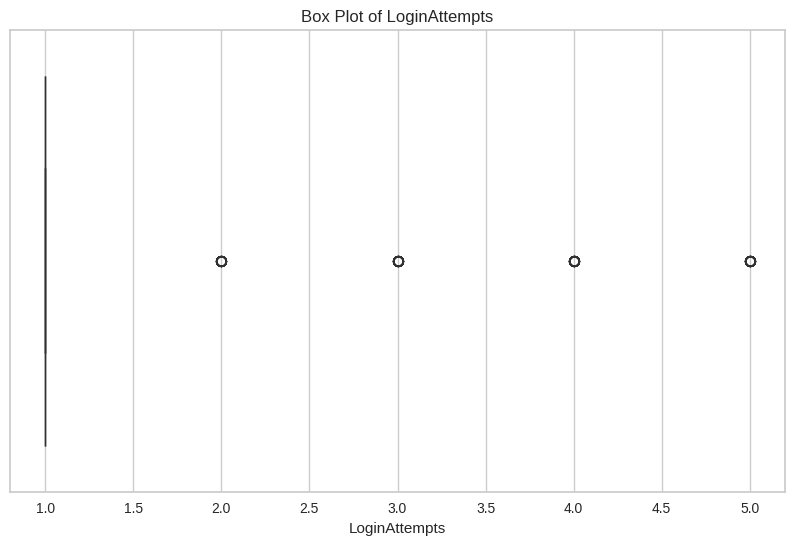

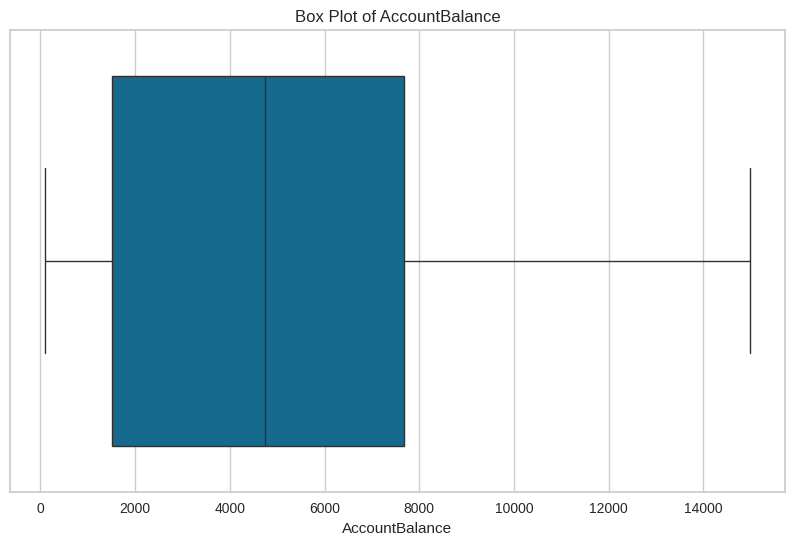

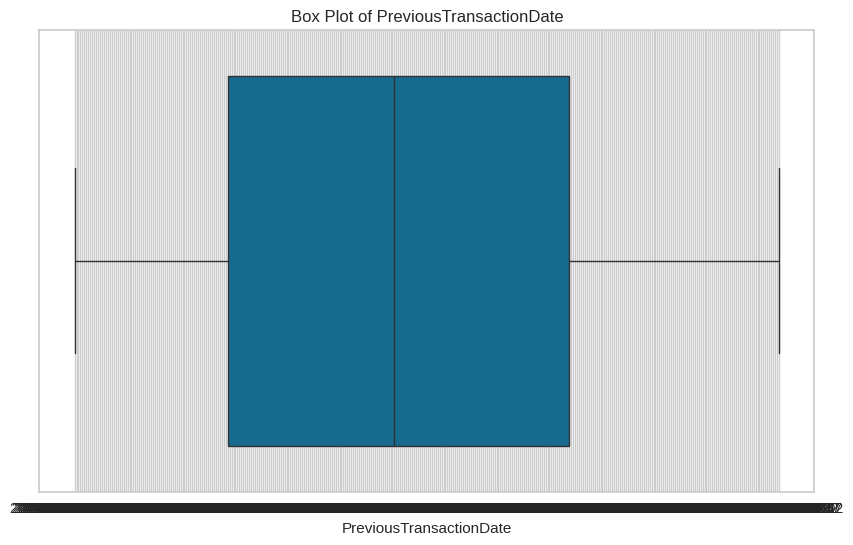

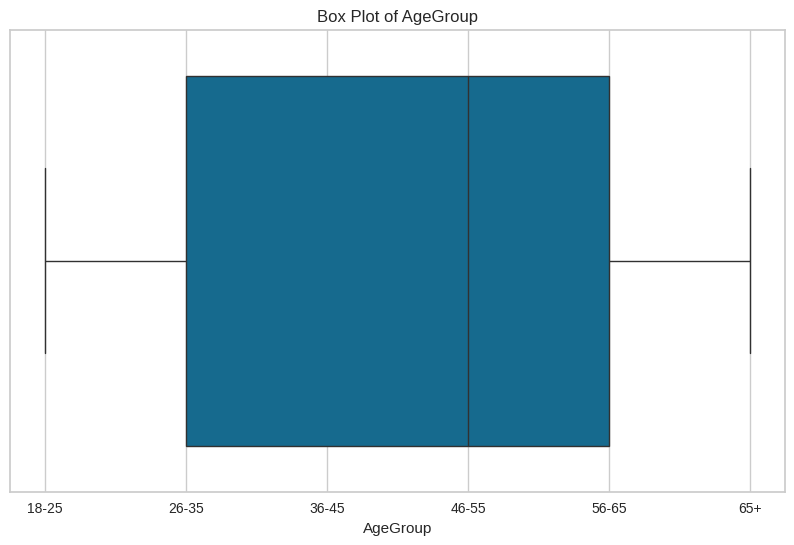

In [ ]:
# visualisasi boxplot untuk mengidentifikasi outlier
for df_outlier in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[df_outlier])
    plt.title(f'Box Plot of {df_outlier}')
    plt.show()

In [ ]:
# Pilih fitur numerik & kategorikal untuk clustering
numerical_features = ['TransactionAmount', 'AccountBalance', 'TransactionDuration', 'LoginAttempts', 'CustomerAge']
categorical_features = ['TransactionType', 'Channel']

In [ ]:
# Encoding fitur kategorikal
df_encoded = pd.get_dummies(df[categorical_features], drop_first=True)

In [ ]:
# 2. Scaling fitur numerik
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
# Gabungkan fitur untuk clustering
df_merged = pd.concat([df[numerical_features], df_encoded], axis=1)
X = df_merged

In [ ]:
X

,TransactionAmount,AccountBalance,TransactionDuration,LoginAttempts,CustomerAge,TransactionType_Debit,Channel_Branch,Channel_Online
0,-0.971275,-0.000537,-0.552443,-0.206794,1.423718,True,False,False
1,0.269440,2.216472,0.305314,-0.206794,1.311287,True,False,False
2,-0.586882,-1.023534,-0.909842,-0.206794,-1.443277,True,False,True
3,-0.387456,0.885797,-1.353017,-0.206794,-1.049768,True,False,True
4,-0.973468,0.593589,1.120184,-0.206794,-1.049768,False,False,True
...,...,...,...,...,...,...,...,...
2507,1.913802,1.942606,-0.152156,-0.206794,-0.656259,False,True,False
2508,-0.157779,-1.245986,0.819969,-0.206794,0.186975,True,True,False
2509,-0.921462,-0.443928,0.376794,-0.206794,0.636700,True,True,False
2510,-0.382420,-0.855705,-1.438793,-0.206794,-1.218415,True,False,True


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# Inisialisasi model K-Means dengan jumlah cluster
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Latih model
kmeans.fit(X)

# Dapatkan label klaster untuk setiap data
df["Cluster"] = kmeans.labels_

# Lihat jumlah data dalam setiap cluster
print(df["Cluster"].value_counts())

Cluster
0    1470
1     947
2      95
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

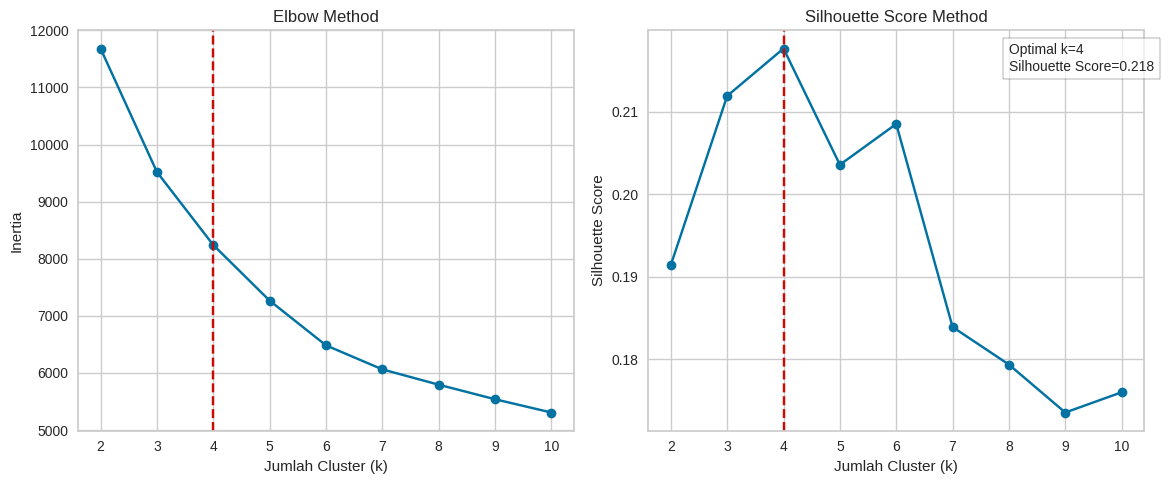

In [ ]:
# mencari cluster optimal dengan Silhouette Score dan Elbow Method
# Data clustering
k_values = range(2, 11)
inertia = []
silhouette_scores = []

for k in k_values:
    kmeans_elbow = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans_elbow.fit_predict(X)
    inertia.append(kmeans_elbow.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

# Menentukan k optimal
optimal_k = k_values[np.argmax(silhouette_scores)]
optimal_silhouette = max(silhouette_scores)

# Plot hasil
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Elbow Method
axes[0].plot(k_values, inertia, marker='o', linestyle='-')
axes[0].set_title("Elbow Method")
axes[0].set_xlabel("Jumlah Cluster (k)")
axes[0].set_ylabel("Inertia")
axes[0].axvline(x=optimal_k, color='r', linestyle='--')  # Garis optimal

# Silhouette Score Method
axes[1].plot(k_values, silhouette_scores, marker='o', linestyle='-')
axes[1].set_title("Silhouette Score Method")
axes[1].set_xlabel("Jumlah Cluster (k)")
axes[1].set_ylabel("Silhouette Score")
axes[1].axvline(x=optimal_k, color='r', linestyle='--')  # Garis optimal

# Tampilkan teks untuk nilai Silhouette Score optimal
axes[1].text(8, 0.215, f"Optimal k={optimal_k}\nSilhouette Score={optimal_silhouette:.3f}",
             fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

In [ ]:
# melihat cluster dan jumlahnya
optimal_k = 4

# Buat model dengan k optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans_optimal.fit_predict(X)

print(df["Cluster"].value_counts())

Cluster
3    1272
2     828
1     317
0      95
Name: count, dtype: int64


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Misal, kita coba seleksi 2 fitur terbaik (bisa di-tuning)
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X, labels)  # label = hasil clustering sebelumnya

# Ambil nama fitur yang terpilih
selected_features = X.columns[selector.get_support()]
print(f"Fitur terpilih: {list(selected_features)}")

Fitur terpilih: ['LoginAttempts', 'CustomerAge']


In [ ]:
# Clustering ulang dengan fitur hasil seleksi
k_values_new = range(2, 11)
inertia_new = []
silhouette_scores_new = []

for k in k_values_new:
    kmeans_fs = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_new = kmeans_fs.fit_predict(X_selected)
    inertia_new.append(kmeans_fs.inertia_)
    silhouette_scores_new.append(silhouette_score(X_selected, labels_new))

optimal_k_new = k_values_new[np.argmax(silhouette_scores_new)]
optimal_silhouette_new = max(silhouette_scores_new)

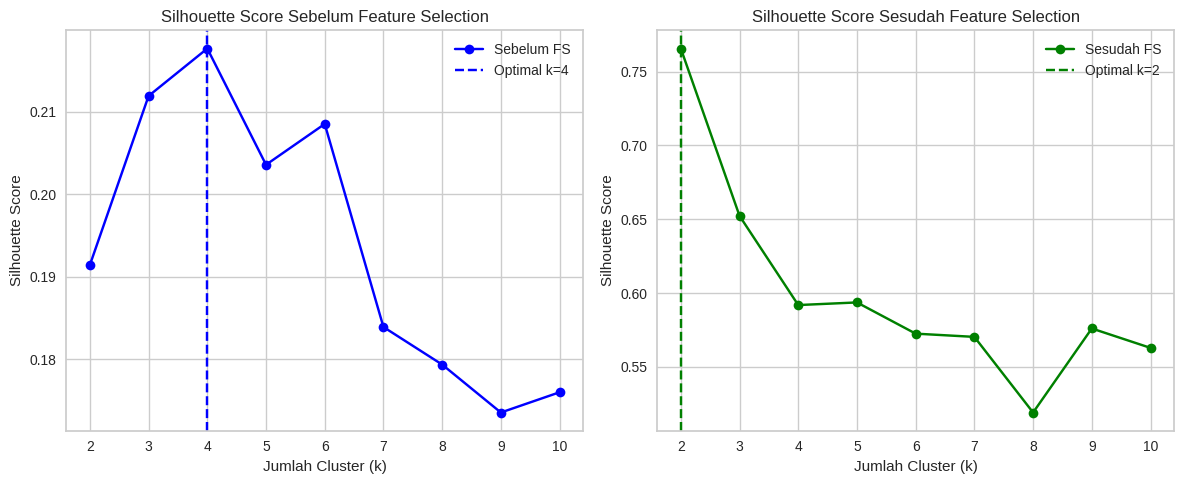

Score Silhouette sebelum FS: 0.218
Score Silhouette sesudah FS: 0.766


In [ ]:
# visualisasi perbandingan sebelum dan sesudah feature selection
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Sebelum feature selection
axes[0].plot(k_values, silhouette_scores, marker='o', label='Sebelum FS', color='blue')
axes[0].axvline(x=optimal_k, color='blue', linestyle='--', label=f'Optimal k={optimal_k}')
axes[0].set_title("Silhouette Score Sebelum Feature Selection")
axes[0].set_xlabel("Jumlah Cluster (k)")
axes[0].set_ylabel("Silhouette Score")
axes[0].legend()
axes[0].grid(True)

# Sesudah feature selection
axes[1].plot(k_values_new, silhouette_scores_new, marker='o', label='Sesudah FS', color='green')
axes[1].axvline(x=optimal_k_new, color='green', linestyle='--', label=f'Optimal k={optimal_k_new}')
axes[1].set_title("Silhouette Score Sesudah Feature Selection")
axes[1].set_xlabel("Jumlah Cluster (k)")
axes[1].set_ylabel("Silhouette Score")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

print(f"Score Silhouette sebelum FS: {optimal_silhouette:.3f}")
print(f"Score Silhouette sesudah FS: {optimal_silhouette_new:.3f}")

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

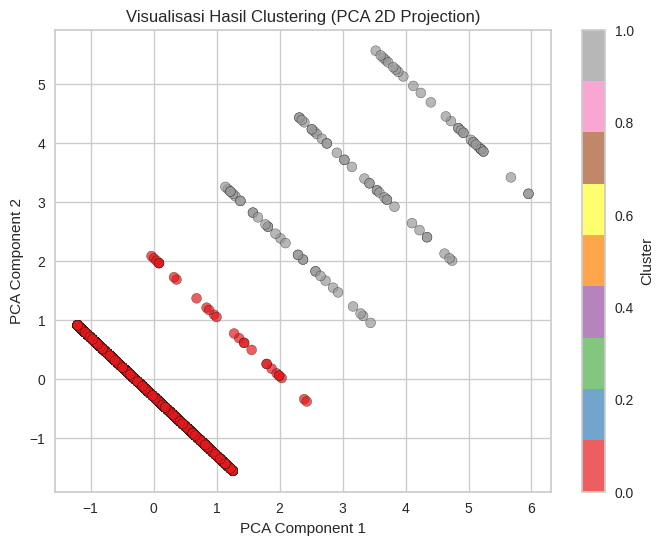

In [ ]:
# Turunkan ke 2D menggunakan PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_selected)

# Clustering ulang dengan k optimal hasil FS
kmeans_final = KMeans(n_clusters=optimal_k_new, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(X_selected)

# Plot scatter cluster
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_final, cmap='Set1', s=50, alpha=0.7, edgecolor='k')
plt.title("Visualisasi Hasil Clustering (PCA 2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Tambahkan label cluster ke df asli (sebelum PCA)
df_result = df.copy()
df_result['Cluster'] = labels_final

In [ ]:
# Inverse StandardScaler untuk kolom numerik
df_result[numerical_features] = scaler.inverse_transform(df_result[numerical_features])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Hitung rata-rata per cluster
cluster_avg = df_result.groupby('Cluster')[['TransactionAmount', 'LoginAttempts']].mean()

# Tampilkan rata-rata tiap cluster
for cluster_id, row in cluster_avg.iterrows():
    print(f"Cluster {cluster_id + 1}:")
    print(f"Rata-rata Transaction Amount: {row['TransactionAmount']:.2f}")
    print(f"Rata-rata Login Attempts: {row['LoginAttempts']:.2f}")
    print('-'*50)

Cluster 1:
Rata-rata Transaction Amount: 298.43
Rata-rata Login Attempts: 1.01
--------------------------------------------------
Cluster 2:
Rata-rata Transaction Amount: 276.32
Rata-rata Login Attempts: 4.01
--------------------------------------------------


Tulis hasil interpretasinya di sini.
1. Cluster 1:
*  **Rata-rata Transaction Amount:** 298.43
*  **Rata-rata Login Attempts:** 1.01
*  **analisis :** Cluster ini mencakup pengguna dengan rata-rata jumlah transaksi yang sedikit lebih tinggi dan jumlah percobaan login yang rendah. Ini menunjukkan bahwa pengguna dalam cluster ini cenderung melakukan transaksi dengan lebih lancar tanpa banyak kendala saat login.
2. Cluster 2:
*   **Rata-rata Transaction Amount:** 276.32
*   **Rata-rata Login Attempts:** 4.01
*   **Analisis**: Cluster ini menunjukkan pengguna dengan rata-rata jumlah transaksi yang sedikit lebih rendah, namun dengan jumlah percobaan login yang lebih tinggi. Hal ini dapat mengindikasikan adanya potensi anomali atau aktivitas mencurigakan seperti gagal login yang berulang, yang perlu diwaspadai sebagai indikasi risiko atau perilaku pengguna yang tidak biasa.



# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df_result.to_csv('/content/drive/MyDrive/ML dicoding/machine learning untuk pemula/submission/Dataset_klasifikasi.csv', index=False)